## Importação

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib


## (Re)carregar dados pré-processados

In [6]:
df = pd.read_csv('../data/churn_data.csv')
X = df.drop(columns=['id', 'churn'])
y = df['churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

## Treinamento

In [7]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Avaliação

              precision    recall  f1-score   support

           0       0.67      0.81      0.74      1660
           1       0.38      0.23      0.28       840

    accuracy                           0.62      2500
   macro avg       0.53      0.52      0.51      2500
weighted avg       0.58      0.62      0.58      2500



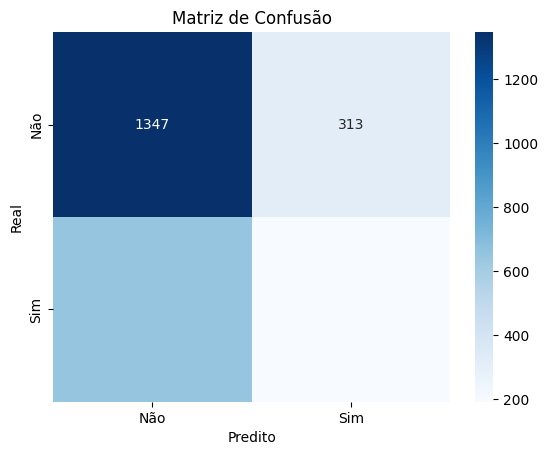

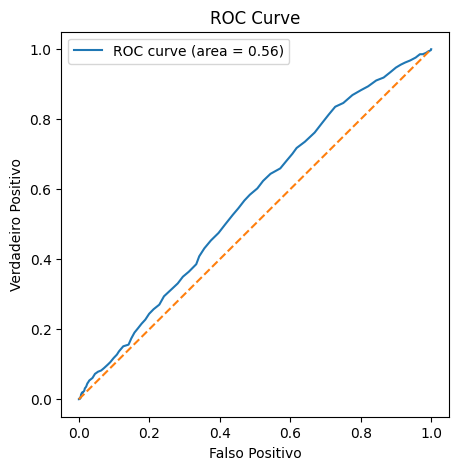

In [8]:
import seaborn as sns

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não', 'Sim'], yticklabels=['Não', 'Sim'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'--')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Importância das features

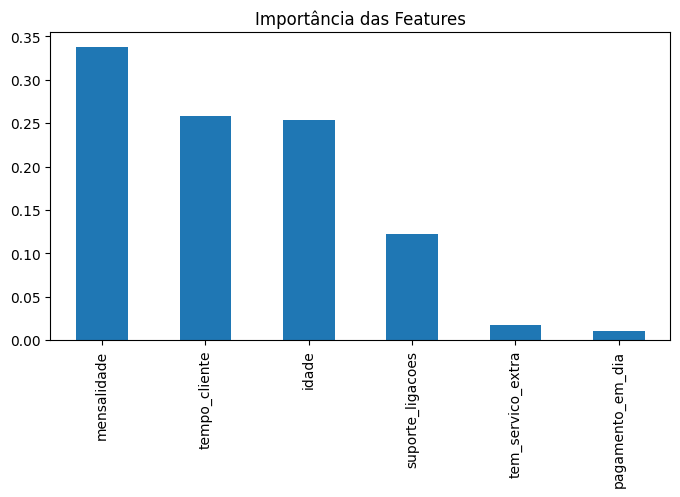

In [9]:
importances = model.feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)
feat_imp.plot(kind='bar', figsize=(8,4), title='Importância das Features')
plt.show()

## Salvar o modelo

In [12]:
joblib.dump(model, '../app/modelo_churn.pkl')

['../app/modelo_churn.pkl']